In [1]:
#import crystal_mod as cry_mod 
import mode_analysis_code_original as ma
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
num_ions=6
mass_amu=9.012182
vtrap=(0.0, -1750.0, -1970.0)
v_wall=0.
frot=180000
method='bfgs'
frot_kHz = 1e-3*frot 

ma_instance=ma.ModeAnalysis(
            N      = num_ions,
            ionmass= mass_amu,
            Vtrap  = vtrap,
            Vwall  = v_wall,
            frot   = frot_kHz,
            method = method)
ma_instance.run()

In [3]:
pos = ma_instance.uE

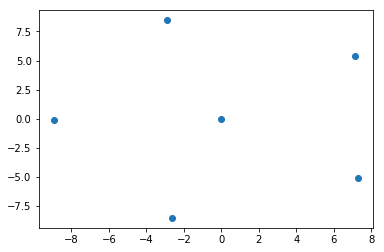

[  1.43342458e-16   7.15048302e-06  -8.92822054e-06  -2.87643974e-06
  -2.64150401e-06   7.29568128e-06]
[  7.00644210e-17   5.34780050e-06  -1.23513021e-07   8.45307470e-06
  -8.52940995e-06  -5.14795223e-06]


In [4]:
plt.scatter(pos[0:ma_instance.Nion]*1e6,pos[ma_instance.Nion:]*1e6)
plt.show()
print(pos[:num_ions])
print(pos[num_ions:])

In [10]:
x = np.array([2,1,3])
y = np.array([5,4,6])
r = np.sqrt(x ** 2 + y ** 2)
print(x)
print(y)
print(r)
sort_ind = np.argsort(r)

r = r[sort_ind]
x = x[sort_ind]
y = y[sort_ind]
print(x)
print(y)
print(r)

dx = x.reshape((x.size, 1)) - x
print(dx)
dy = y.reshape((y.size, 1)) - y
print(dy)
rsep = np.sqrt(dx ** 2 + dy ** 2)
print(rsep)

with np.errstate(divide='ignore'):
    rsep3 = np.where(rsep != 0., rsep ** (-3), 0)
print(rsep3)

K = np.diag((-1 + 0.5 * np.sum(rsep3, axis=0)))
print(K)

K -= 0.5 * rsep3
print(K)

Zn = np.zeros((3, 3))
eyeN = np.identity(3)
print(Zn)
print(eyeN)
Mmat = np.diag(np.array([2,2,2]))
print(Mmat)
Minv = np.linalg.inv(Mmat)
firstOrder = np.bmat([[Zn, eyeN], [np.dot(Minv,K), Zn]])
print(firstOrder)

[2 1 3]
[5 4 6]
[ 5.38516481  4.12310563  6.70820393]
[1 2 3]
[4 5 6]
[ 4.12310563  5.38516481  6.70820393]
[[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]]
[[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]]
[[ 0.          1.41421356  2.82842712]
 [ 1.41421356  0.          1.41421356]
 [ 2.82842712  1.41421356  0.        ]]
[[ 0.          0.35355339  0.04419417]
 [ 0.35355339  0.          0.35355339]
 [ 0.04419417  0.35355339  0.        ]]
[[-0.80112622  0.          0.        ]
 [ 0.         -0.64644661  0.        ]
 [ 0.          0.         -0.80112622]]
[[-0.80112622 -0.1767767  -0.02209709]
 [-0.1767767  -0.64644661 -0.1767767 ]
 [-0.02209709 -0.1767767  -0.80112622]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[2 0 0]
 [0 2 0]
 [0 0 2]]
[[ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 